# Libraries

In [21]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import joblib

# Preprocessing and Data Analysis

In [22]:
df = pd.read_csv(r"./Data.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annual,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [23]:
print(f"training set (row, col): {df.shape}")

training set (row, col): (4269, 13)


In [24]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annual             4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [25]:
df.describe()

,loan_id,no_of_dependents,income_annual,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [26]:
df.drop('loan_id',axis=1,inplace=True)

print(f"training set (row, col): {df.shape}")

training set (row, col): (4269, 12)


## Data visualization

Firstly we need to split our data to categorical and numerical data

In [27]:
num = df.select_dtypes('number').columns.to_list()

cat = df.select_dtypes('object').columns.to_list()

loan_num =  df[num]

loan_cat = df[cat]

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


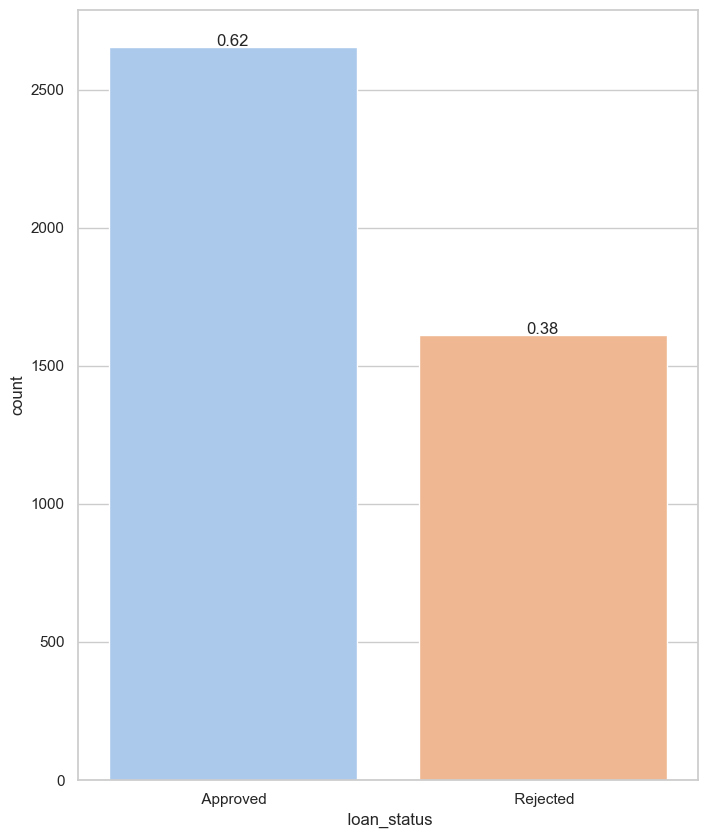

In [28]:
print(df[cat[-1]].value_counts())

total = float(len(df[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(df, x=cat[-1], palette="pastel", hue=cat[-1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

## Loan status distribution

Let's plot our data

Numeric:

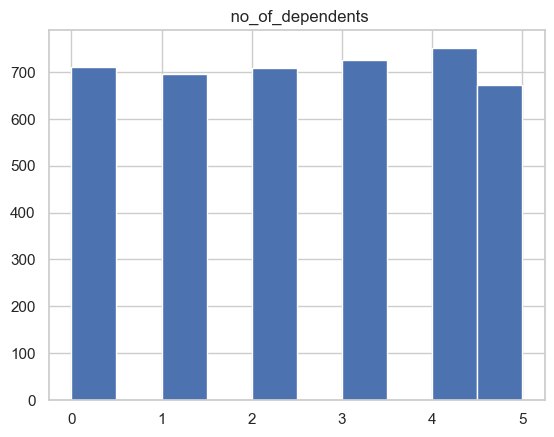

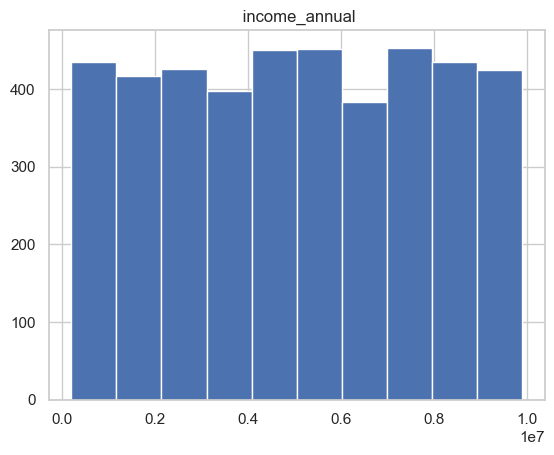

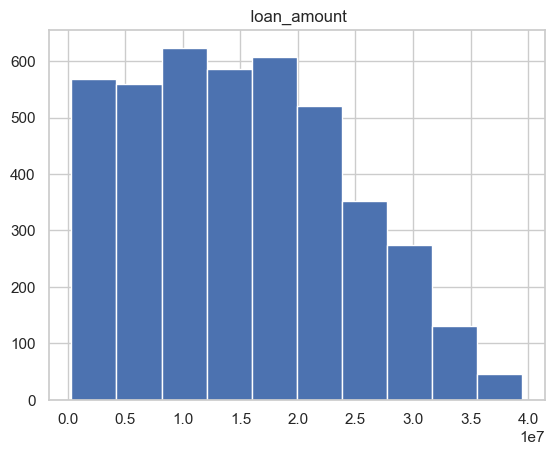

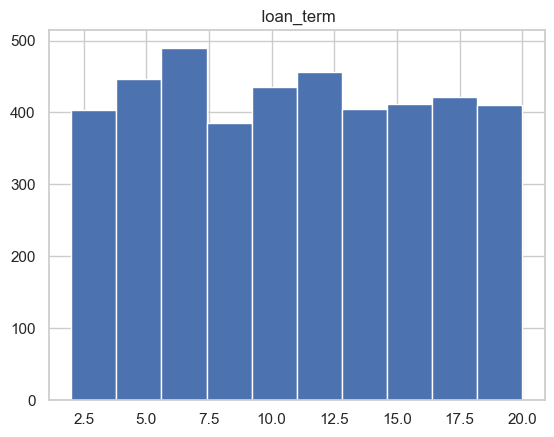

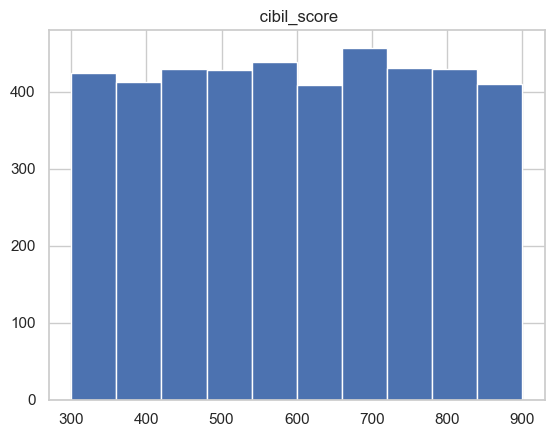

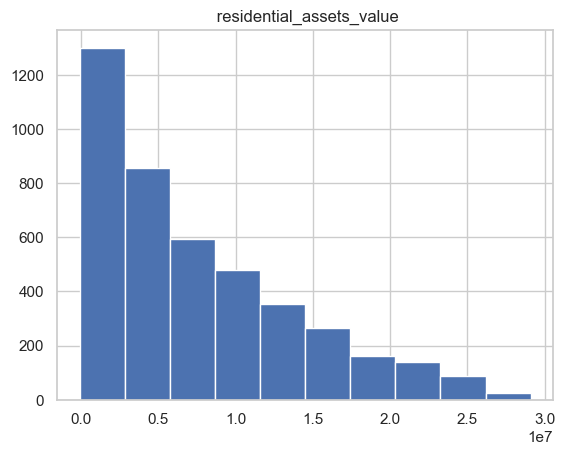

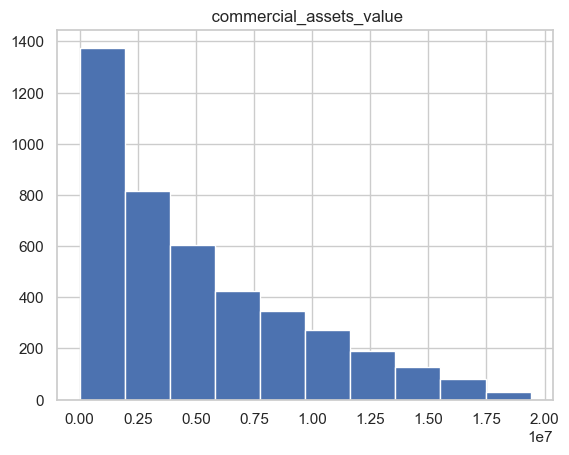

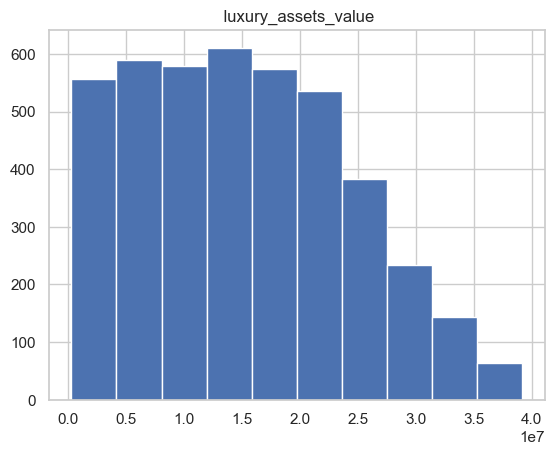

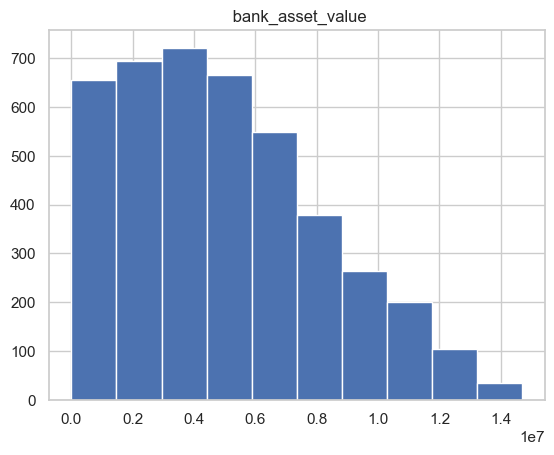

In [29]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

Categorical (split by Loan status):

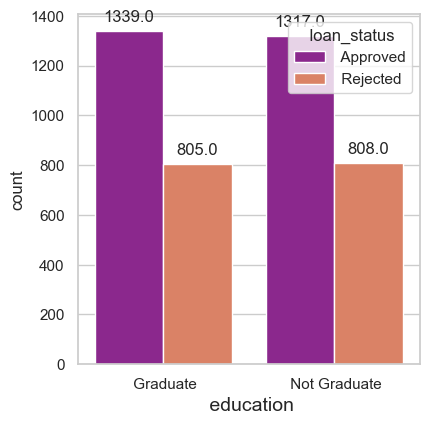

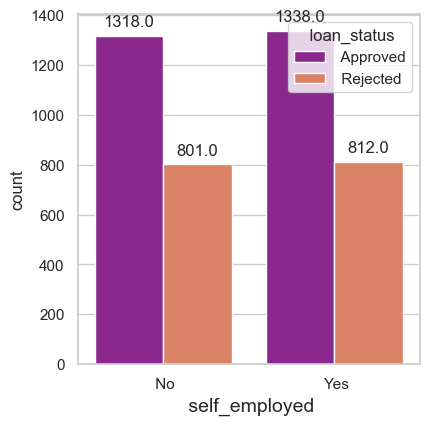

In [30]:
for i in cat[:-1]:
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)

    sns.countplot(x=i, hue=' loan_status', data=df, palette='plasma')

    for p in plt.gca().patches:
        if p.get_width() == 0:
            continue
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

    plt.xlabel(i, fontsize=14)

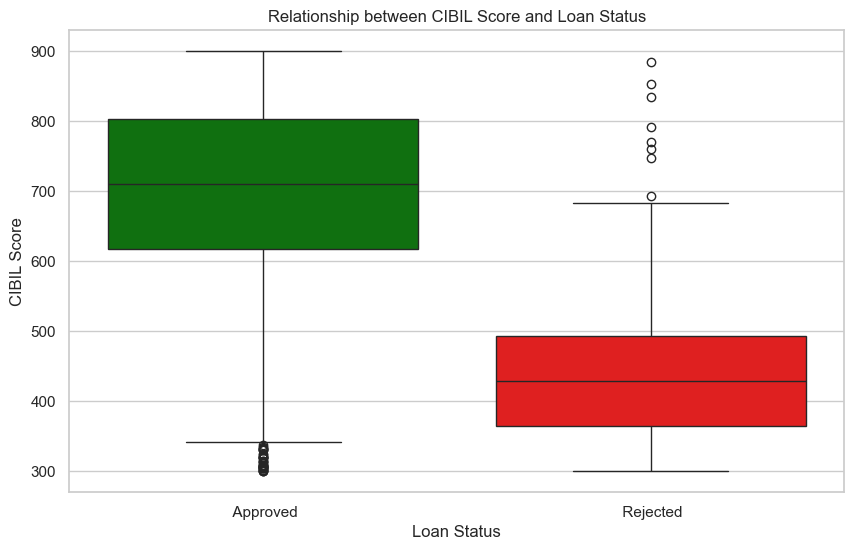

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[' loan_status'], y=df[' cibil_score'], data=df, palette={' Approved': 'green', ' Rejected': 'red'})
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.title('Relationship between CIBIL Score and Loan Status')
plt.show()

# Encoding data to numeric

In [32]:
to_numeric = {' Yes': 1, ' No': 2,
' Graduate': 1, ' Not Graduate': 2,
' Approved': 1, ' Rejected': 0}

df = df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

print(f"training set (row, col): {df.shape}")
print(df.info())


training set (row, col): (4269, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annual             4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB
None


# Data Normalization

In [33]:
variables_to_scale = [' income_annual', ' loan_amount', ' loan_term',' cibil_score', ' residential_assets_value', ' commercial_assets_value', 
                      ' luxury_assets_value', ' bank_asset_value']
scaler_minmax = MinMaxScaler()
df[variables_to_scale] = scaler_minmax.fit_transform(df[variables_to_scale])
df

,no_of_dependents,education,self_employed,income_annual,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,2,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1
1,0,2,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0
2,3,1,2,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0
3,3,1,2,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0
4,5,2,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0
4265,0,2,1,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1
4266,2,2,2,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,0
4267,1,2,2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1


## Correlation matrix

<Axes: >

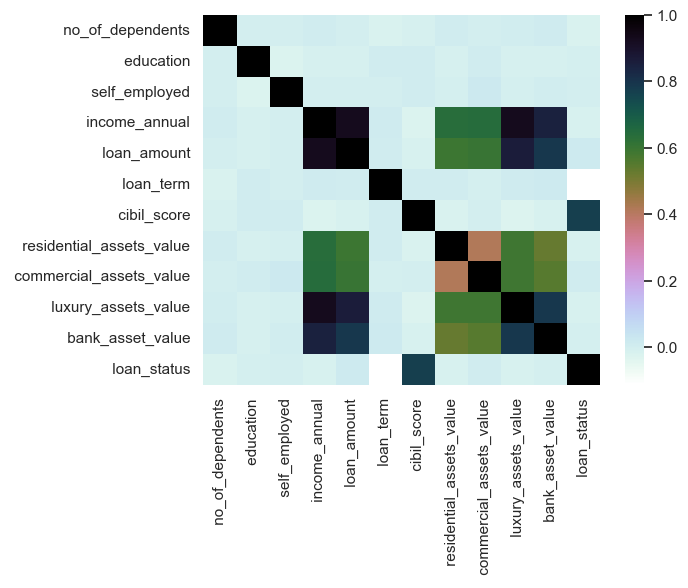

In [34]:
sns.heatmap(df.corr() ,cmap='cubehelix_r')

# Machine learning models

First of all we will divide our dataset into two variables X as the features we defined earlier and y as the Loan_Status the target value we want to predict.

## Models we will use:

- Decision Tree- 
Random Forest
- XGBoost

- Logistic Regression


## The Process of Modeling the Data:

1) Importing the model 

2) Fitting the model

3) Predicting Loan Status

4) Classification report by Loan Status

5) Overall accuracy

In [41]:
y = df[' loan_status']
X = df.drop(' loan_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state =42)

## Decision Tree

In [42]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

print(classification_report(y_test, y_predict))

DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       484
           1       0.98      0.98      0.98       797

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

98.05% Accurate


## Random Forest

In [43]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

print(classification_report(y_test, y_predict))

RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       484
           1       0.99      0.98      0.99       797

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

98.28% Accurate


## XGBoost

In [44]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

print(classification_report(y_test, y_predict))

XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       484
           1       0.99      0.99      0.99       797

    accuracy                           0.99      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.99      0.99      0.99      1281

98.52% Accurate


## Logistic Regression

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

print(classification_report(y_test, y_predict))

lr_SC = accuracy_score(y_predict,y_test)
print(f"{round(lr_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       484
           1       0.93      0.94      0.94       797

    accuracy                           0.92      1281
   macro avg       0.92      0.91      0.91      1281
weighted avg       0.92      0.92      0.92      1281

91.88% Accurate


# Conclusion

1) Cibil_Score is a very important variable because of its high correlation with Loan_Status therefor showing high Dependancy for the latter.2) XGBoost algorithm is the most accurate:  approximately 98%..

In [46]:
score = [DT_SC,RF_SC,XGB_SC,lr_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost","Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
2,XGBoost,0.985168
1,Random Forest,0.982826
0,Decision Tree,0.980484
3,Logistic Regression,0.918813


In [47]:
joblib.dump(XGB, 'xgb_model.pkl')
joblib.dump(scaler_minmax, 'scaler_minmax.pkl')

['scaler_minmax.pkl']